# Fourier point source

In [2]:
%load_ext autoreload
%autoreload 2
import site
import sys
site.addsitedir('..')

In [3]:
import numpy as np
from  matplotlib import pyplot as plt
from src.utils import *
from src.projection import project, rotate
from src.interpolate import *

## Important: in Fourier domain, the point is rotated in the fftshifted coordinates (i.e. 0 in the centre) - working now
Now it's working, no need to do it step by step from the next header

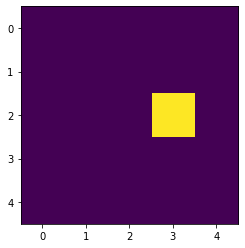

In [45]:
nx = 5
dx = 0.2

v = np.zeros([nx,nx,nx])
v[2,3,2] = 1
#v[1,1,0] = 1

plt.imshow(v[:,:,2])

In [41]:
x_freq = np.fft.fftfreq(nx, dx)
y_freq = np.fft.fftfreq(nx, dx)
z_freq = np.fft.fftfreq(nx, dx)

X, Y, Z = np.meshgrid(x_freq, y_freq, z_freq, indexing = 'xy')

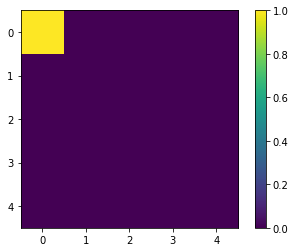

In [42]:
angles = np.array([0,0,np.pi/4])

vp, Xp, Yp, Zp = project(np.fft.ifftshift(v), X, Y, Z, angles, "nn")
plt.imshow(np.fft.fftshift(vp))
plt.colorbar()

### Do the steps in project

So far: angles = 0 is OK

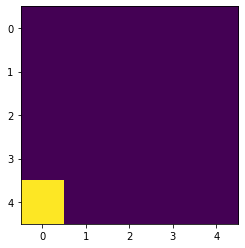

In [280]:
nx = 5
dx = 0.2

v = np.zeros([nx,nx,nx])
v[4,0,2] = 1

x_freq = np.fft.fftfreq(nx, dx)
y_freq = np.fft.fftfreq(nx, dx)
z_freq = np.fft.fftfreq(nx, dx)

X, Y, Z = np.meshgrid(x_freq, y_freq, z_freq, indexing = 'xy')

plt.imshow(v[:,:,2])

In [281]:
angles = np.array([0,0,np.pi/2])
X_r, Y_r,Z_r = rotate(X, Y, Z, angles)

In [282]:
slice_coords = np.array([X_r[:,:,0].flatten(), Y_r[:,:,0].flatten(), Z_r[:,:,0].flatten()])
slice_coords.T

array([[ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 6.1232340e-17,  1.0000000e+00,  0.0000000e+00],
       [ 1.2246468e-16,  2.0000000e+00,  0.0000000e+00],
       [-1.2246468e-16, -2.0000000e+00,  0.0000000e+00],
       [-6.1232340e-17, -1.0000000e+00,  0.0000000e+00],
       [-1.0000000e+00,  6.1232340e-17,  0.0000000e+00],
       [-1.0000000e+00,  1.0000000e+00,  0.0000000e+00],
       [-1.0000000e+00,  2.0000000e+00,  0.0000000e+00],
       [-1.0000000e+00, -2.0000000e+00,  0.0000000e+00],
       [-1.0000000e+00, -1.0000000e+00,  0.0000000e+00],
       [-2.0000000e+00,  1.2246468e-16,  0.0000000e+00],
       [-2.0000000e+00,  1.0000000e+00,  0.0000000e+00],
       [-2.0000000e+00,  2.0000000e+00,  0.0000000e+00],
       [-2.0000000e+00, -2.0000000e+00,  0.0000000e+00],
       [-2.0000000e+00, -1.0000000e+00,  0.0000000e+00],
       [ 2.0000000e+00, -1.2246468e-16,  0.0000000e+00],
       [ 2.0000000e+00,  1.0000000e+00,  0.0000000e+00],
       [ 2.0000000e+00,  2.0000

In [283]:
print(X[:,:,0])
print(X_r[:,:,0])

[[ 0.  1.  2. -2. -1.]
 [ 0.  1.  2. -2. -1.]
 [ 0.  1.  2. -2. -1.]
 [ 0.  1.  2. -2. -1.]
 [ 0.  1.  2. -2. -1.]]
[[ 0.0000000e+00  6.1232340e-17  1.2246468e-16 -1.2246468e-16
  -6.1232340e-17]
 [-1.0000000e+00 -1.0000000e+00 -1.0000000e+00 -1.0000000e+00
  -1.0000000e+00]
 [-2.0000000e+00 -2.0000000e+00 -2.0000000e+00 -2.0000000e+00
  -2.0000000e+00]
 [ 2.0000000e+00  2.0000000e+00  2.0000000e+00  2.0000000e+00
   2.0000000e+00]
 [ 1.0000000e+00  1.0000000e+00  1.0000000e+00  1.0000000e+00
   1.0000000e+00]]


In [284]:
print(Y[:,:,0])
print(Y_r[:,:,0])

[[ 0.  0.  0.  0.  0.]
 [ 1.  1.  1.  1.  1.]
 [ 2.  2.  2.  2.  2.]
 [-2. -2. -2. -2. -2.]
 [-1. -1. -1. -1. -1.]]
[[ 0.0000000e+00  1.0000000e+00  2.0000000e+00 -2.0000000e+00
  -1.0000000e+00]
 [ 6.1232340e-17  1.0000000e+00  2.0000000e+00 -2.0000000e+00
  -1.0000000e+00]
 [ 1.2246468e-16  1.0000000e+00  2.0000000e+00 -2.0000000e+00
  -1.0000000e+00]
 [-1.2246468e-16  1.0000000e+00  2.0000000e+00 -2.0000000e+00
  -1.0000000e+00]
 [-6.1232340e-17  1.0000000e+00  2.0000000e+00 -2.0000000e+00
  -1.0000000e+00]]


In [286]:
print(x_freq)
print(y_freq)
print(z_freq)

[ 0.  1.  2. -2. -1.]
[ 0.  1.  2. -2. -1.]
[ 0.  1.  2. -2. -1.]


In [285]:
slice_interp = interpolate(slice_coords, x_freq, y_freq, z_freq, np.fft.ifftshift(v),"nn")
slice_interp_2d = np.fft.fftshift(slice_interp.reshape(X_r.shape[0], X_r.shape[1]))

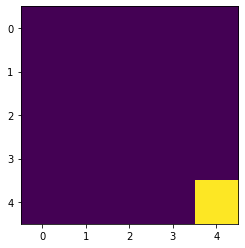

In [278]:
plt.imshow(slice_interp_2d)

In [16]:
idx = (2,3,2)
v[idx]

1.0

In [13]:
v.shape

(5, 5, 5)

In [49]:
0.4/0.2

2.0

In [52]:
6/0.2

30.0